# Dataset preperation

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os
import cv2
import csv
from datetime import datetime
from sklearn.impute import SimpleImputer

## Elevation Data

In [8]:
# This file contains cell wise Elevation data
elevation_data = pd.read_csv('D:/IIT_Work/1=1combined_weather_data.csv')
elevation_data.head()

,Image,Latitude,Longitude,Elevation,TempMax,TempMin,Humidity,Precipitation,WindSpeed,WindGust,SeaLevelPressure,CloudCover
0,28-07-2016.png,26.600526,83.386939,74,32.8,27.3,84.6,0.1,10.1,23.4,1002.2,95.4
1,28-07-2016.png,26.695263,83.035510,82,32.7,27.1,84.7,13.7,14.8,25.9,998.8,95.5
2,28-07-2016.png,26.913158,83.554286,86,33.1,26.4,86.5,37.0,6.5,21.2,1002.5,96.5
3,28-07-2016.png,26.960526,83.345102,77,34.1,26.1,83.2,12.0,7.9,19.8,1001.5,85.8
4,28-07-2016.png,26.865789,83.102449,78,36.3,28.8,74.5,2.0,19.4,45.4,996.2,73.8


Elevation Data Sample:
            Image   Latitude  Longitude  Elevation  TempMax  TempMin  \
0  28-07-2016.png  26.600526  83.386939         74     32.8     27.3   
1  28-07-2016.png  26.695263  83.035510         82     32.7     27.1   
2  28-07-2016.png  26.913158  83.554286         86     33.1     26.4   
3  28-07-2016.png  26.960526  83.345102         77     34.1     26.1   
4  28-07-2016.png  26.865789  83.102449         78     36.3     28.8   

   Humidity  Precipitation  WindSpeed  WindGust  SeaLevelPressure  CloudCover  
0      84.6            0.1       10.1      23.4            1002.2        95.4  
1      84.7           13.7       14.8      25.9             998.8        95.5  
2      86.5           37.0        6.5      21.2            1002.5        96.5  
3      83.2           12.0        7.9      19.8            1001.5        85.8  
4      74.5            2.0       19.4      45.4             996.2        73.8  

Elevation Data Statistics:
           Latitude     Longitude   

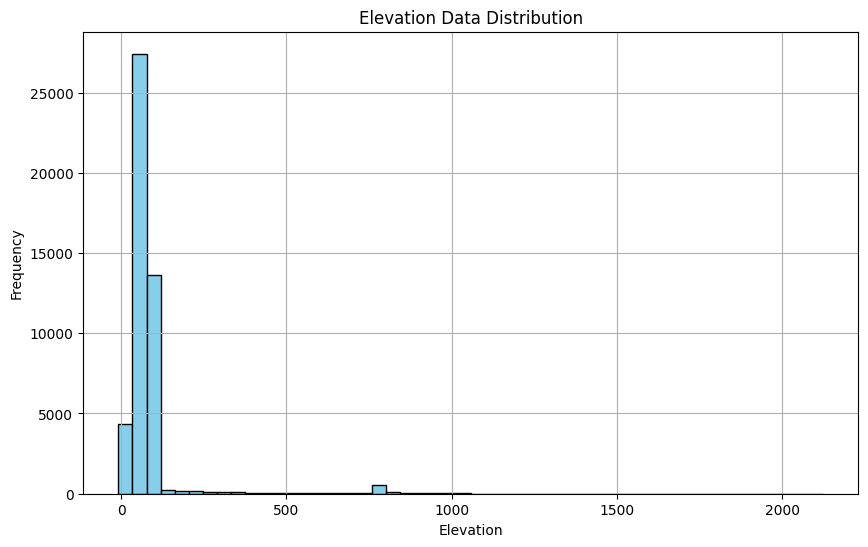

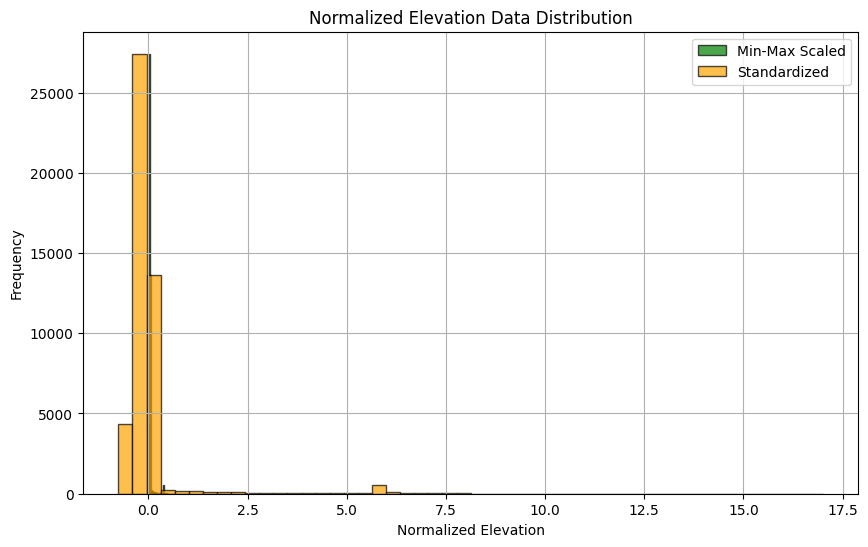

In [9]:
# Display the first few rows
print("Elevation Data Sample:")
print(elevation_data.head())

# Check basic statistics
print("\nElevation Data Statistics:")
print(elevation_data.describe())

# Visualize Elevation Data Distribution
plt.figure(figsize=(10, 6))
plt.hist(elevation_data['Elevation'], bins=50, color='skyblue', edgecolor='black')
plt.title('Elevation Data Distribution')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Normalize Elevation Data using Min-Max Scaling
min_max_scaler = MinMaxScaler()
elevation_data['Elevation_MinMax'] = min_max_scaler.fit_transform(elevation_data[['Elevation']])

# Standardize Elevation Data using StandardScaler
standard_scaler = StandardScaler()
elevation_data['Elevation_Standardized'] = standard_scaler.fit_transform(elevation_data[['Elevation']])

elevation_data['Image'] = elevation_data['Image'].str.replace('.png', '', regex=False)  # Remove .png extension
elevation_data['date'] = pd.to_datetime(elevation_data['Image'], format="%d-%m-%Y").dt.strftime("%m-%d-%Y")  # Convert to MM-DD-YYYY format

columns_to_drop = [
    "TempMax", "TempMin", "Humidity", "Precipitation", 
    "WindSpeed", "WindGust", "SeaLevelPressure", "CloudCover"
]

elevation_data = elevation_data.drop(columns=columns_to_drop, errors="ignore")

# Visualize Normalized Elevation Data
plt.figure(figsize=(10, 6))
plt.hist(elevation_data['Elevation_MinMax'], bins=50, color='green', edgecolor='black', alpha=0.7, label='Min-Max Scaled')
plt.hist(elevation_data['Elevation_Standardized'], bins=50, color='orange', edgecolor='black', alpha=0.7, label='Standardized')
plt.title('Normalized Elevation Data Distribution')
plt.xlabel('Normalized Elevation')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Save the normalized data
# elevation_data.to_csv('/home/pranshu/Harshit/normalized_elevation_data.csv', index=False)
# print("\nNormalized elevation data saved to 'normalized_elevation_data.csv'")


In [10]:
elevation_data.head()
# elevation_data.shape

,Image,Latitude,Longitude,Elevation,Elevation_MinMax,Elevation_Standardized,date
0,28-07-2016,26.600526,83.386939,74,0.038480,-0.074175,07-28-2016
1,28-07-2016,26.695263,83.035510,82,0.042234,-0.007497,07-28-2016
2,28-07-2016,26.913158,83.554286,86,0.044111,0.025843,07-28-2016
3,28-07-2016,26.960526,83.345102,77,0.039887,-0.049171,07-28-2016
4,28-07-2016,26.865789,83.102449,78,0.040357,-0.040836,07-28-2016


## Weather Data

In [11]:
# This File contains previous 5 days weather data
weather_data = pd.read_csv('D:\IIT_Work\LSTM-470img-weather.csv')
weather_data.head()

,datetime,tempmax,tempmin,humidity,precip,windspeed,windgust,sealevelpressure,cloudcover
0,2022-07-04,36.6,28.7,59.5,0.0,22.0,27.4,998.2,32.3
1,2022-07-03,36.1,27.1,60.6,0.6,16.6,24.8,998.4,79.0
2,2022-07-02,36.9,27.4,63.9,11.0,11.5,18.0,998.0,89.7
3,2022-07-01,36.1,27.1,65.7,0.1,8.6,14.4,998.9,72.3
4,2022-06-30,32.5,25.2,78.9,7.2,17.3,27.7,1000.2,82.9


In [12]:
weather_data.shape

(2814, 9)

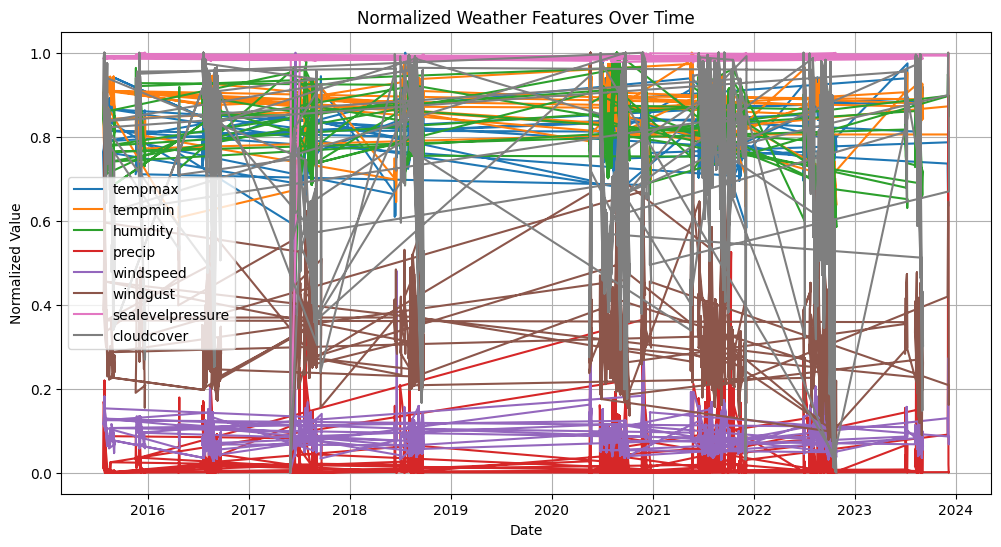

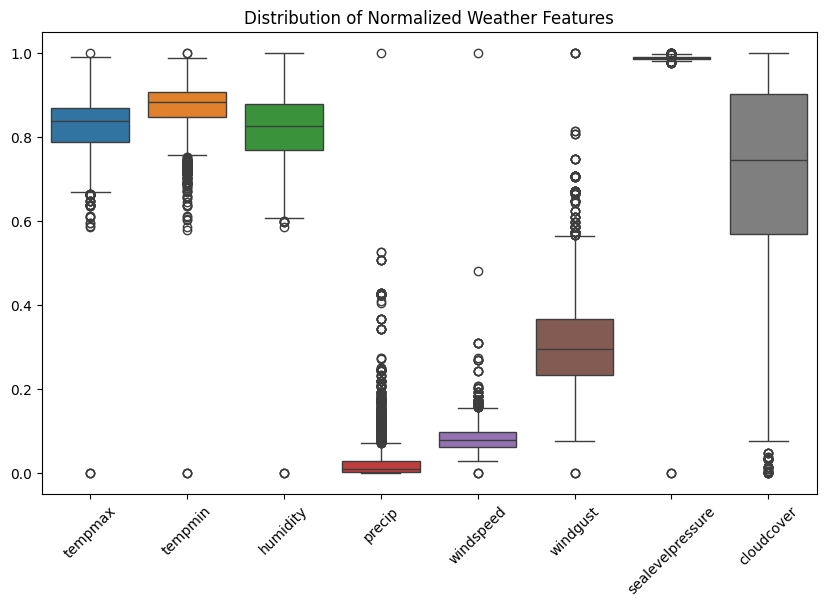

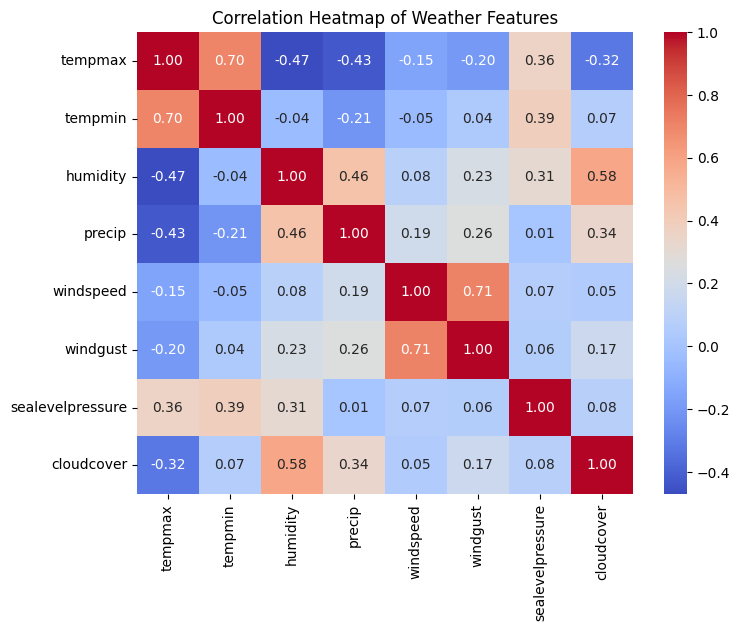

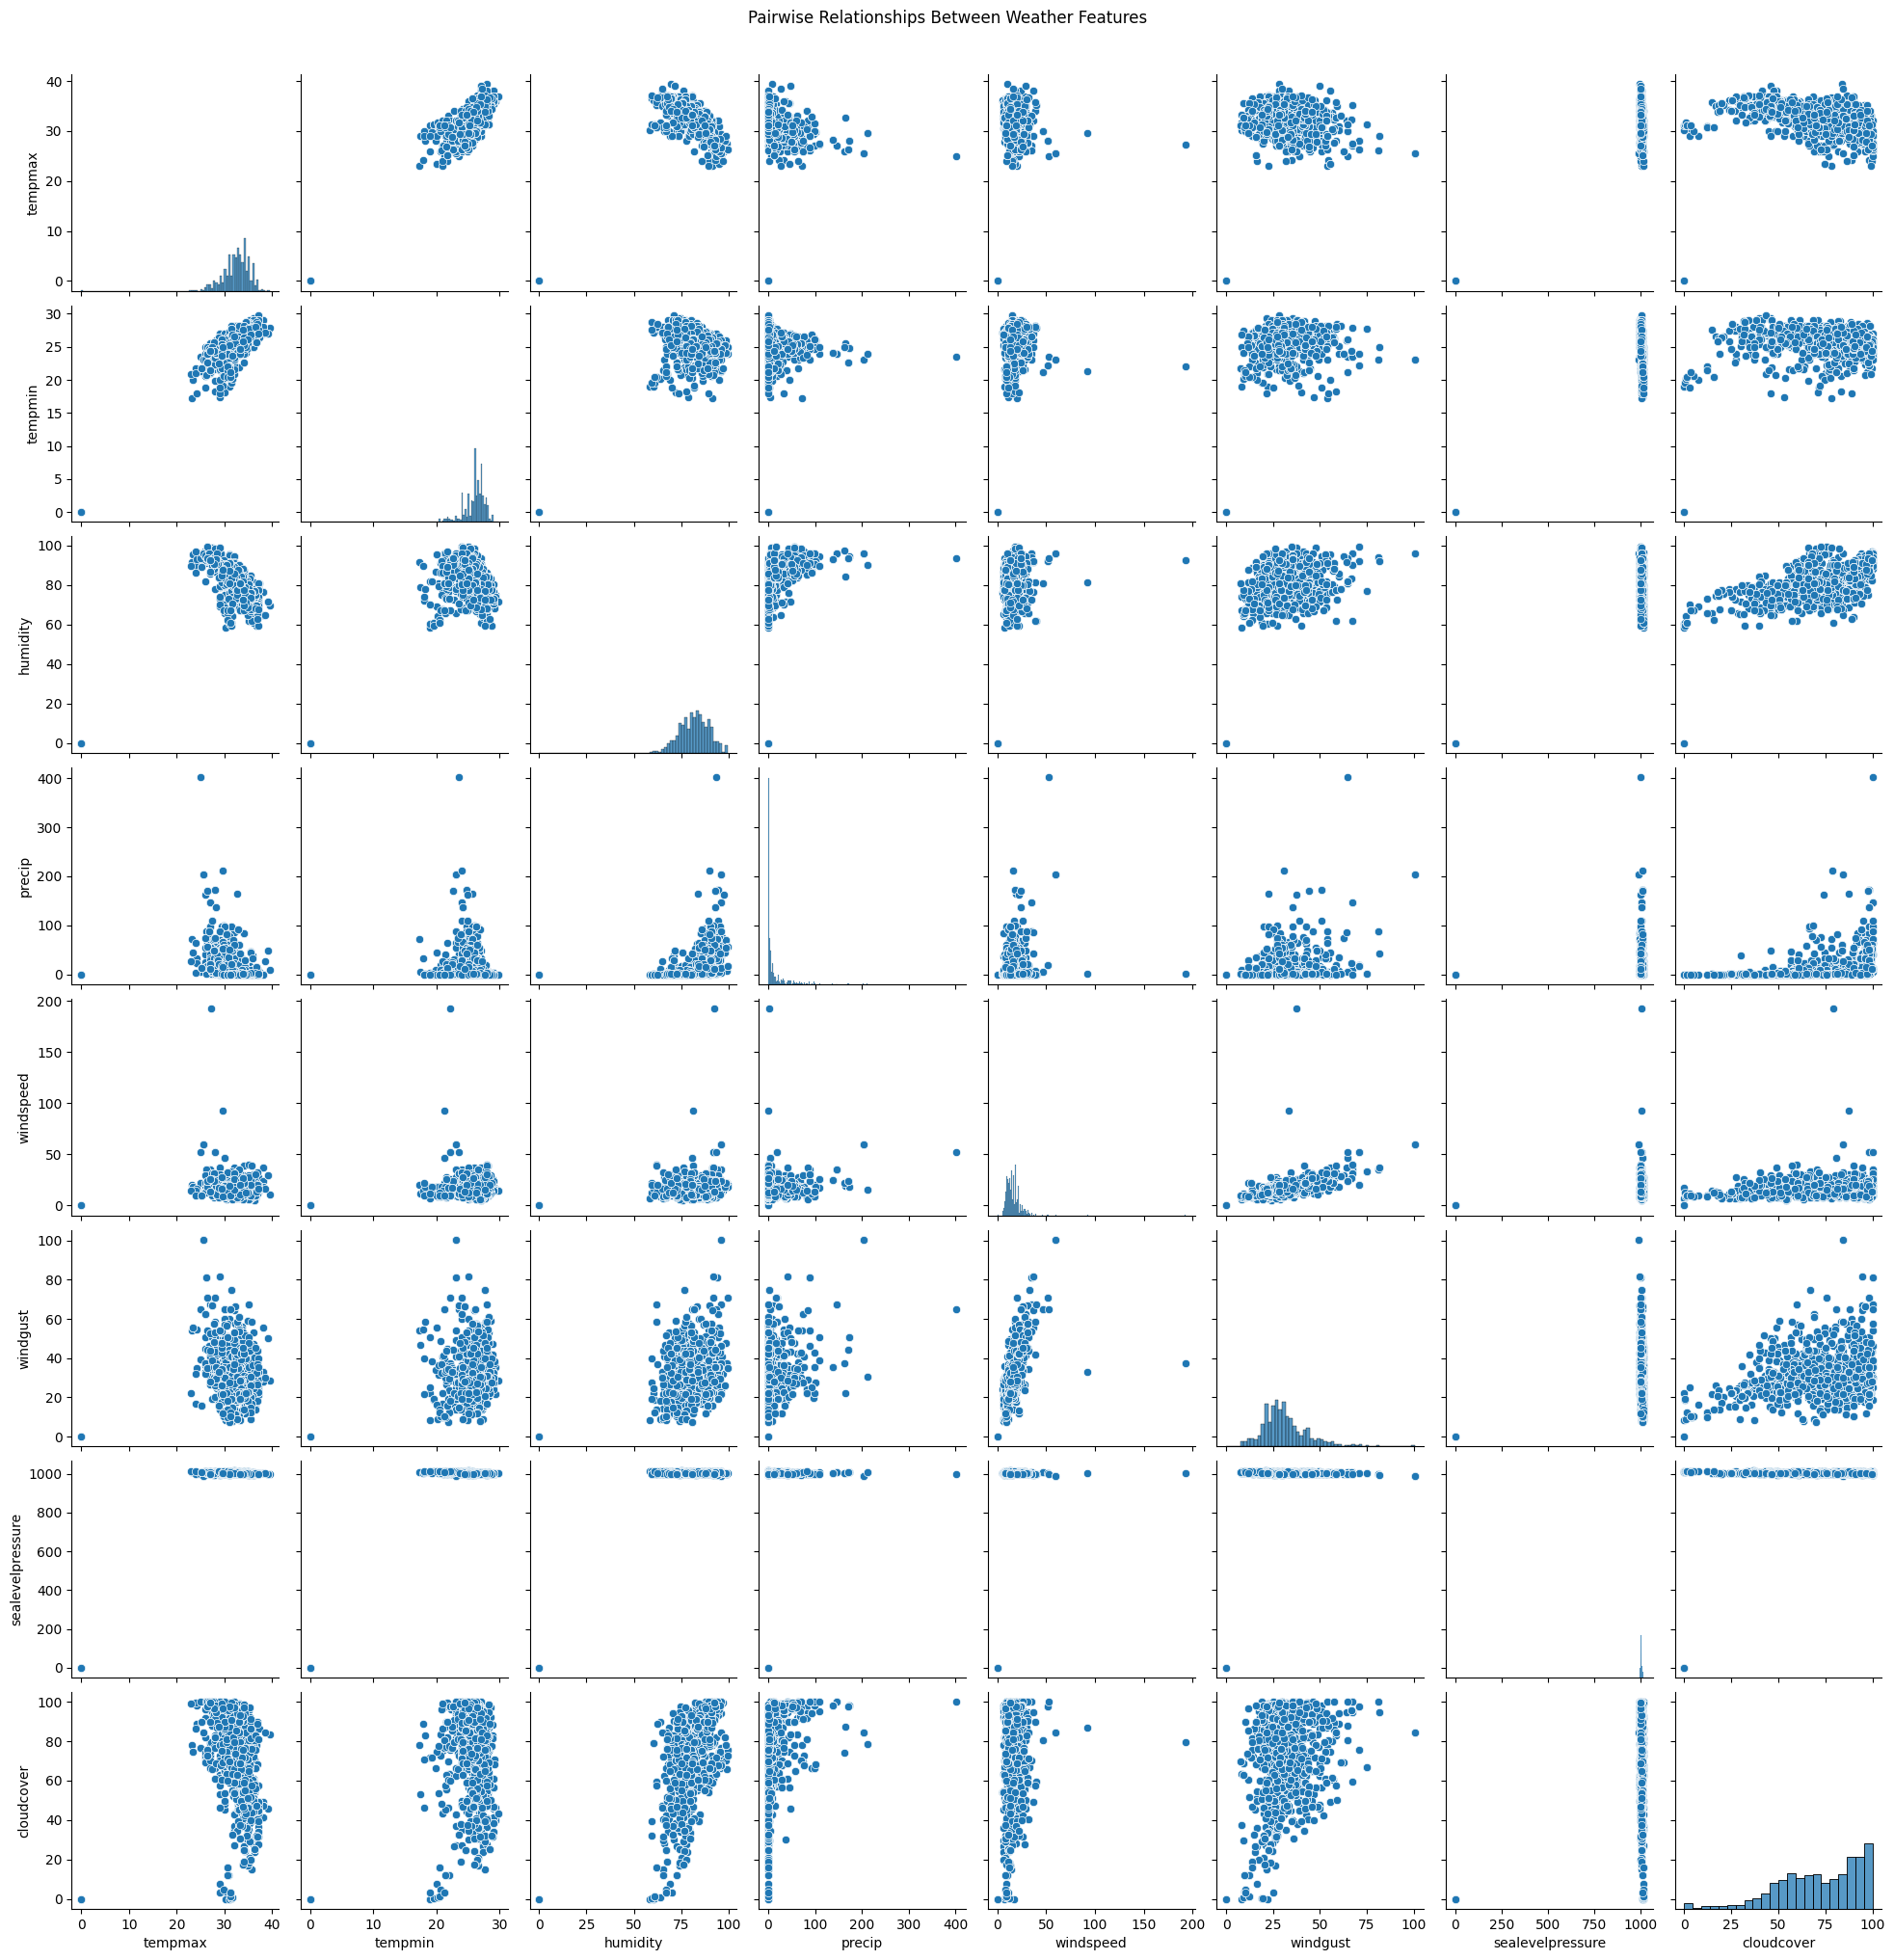

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = weather_data

# Convert datetime to a proper date format
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')

# Feature extraction
features = ['tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'windgust', 'sealevelpressure', 'cloudcover']
weather_data = df[features]

# Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(weather_data)
normalized_df = pd.DataFrame(normalized_data, columns=features)

# Visualization: Line Plot for Trends
plt.figure(figsize=(12, 6))
for column in features:
    plt.plot(df['datetime'], normalized_df[column], label=column)
plt.title('Normalized Weather Features Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()

# Visualization: Boxplot for Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=normalized_df)
plt.title('Distribution of Normalized Weather Features')
plt.xticks(rotation=45)
plt.show()

# Visualization: Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = weather_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Weather Features')
plt.show()

# Impact Analysis: Pairplot
sns.pairplot(weather_data)
plt.suptitle('Pairwise Relationships Between Weather Features', y=1.02)
plt.show()


In [14]:
weather_data.head()

,tempmax,tempmin,humidity,precip,windspeed,windgust,sealevelpressure,cloudcover
0,36.6,28.7,59.5,0.0,22.0,27.4,998.2,32.3
1,36.1,27.1,60.6,0.6,16.6,24.8,998.4,79.0
2,36.9,27.4,63.9,11.0,11.5,18.0,998.0,89.7
3,36.1,27.1,65.7,0.1,8.6,14.4,998.9,72.3
4,32.5,25.2,78.9,7.2,17.3,27.7,1000.2,82.9


In [15]:
normalized_df

,tempmax,tempmin,humidity,precip,windspeed,windgust,sealevelpressure,cloudcover
0,0.928934,0.963087,0.597990,0.000000,0.114226,0.272908,0.982867,0.323
1,0.916244,0.909396,0.609045,0.001494,0.086189,0.247012,0.983064,0.790
2,0.936548,0.919463,0.642211,0.027383,0.059709,0.179283,0.982670,0.897
3,0.916244,0.909396,0.660302,0.000249,0.044652,0.143426,0.983557,0.723
4,0.824873,0.845638,0.792965,0.017923,0.089823,0.275896,0.984837,0.829
...,...,...,...,...,...,...,...,...
2809,0.873096,0.838926,0.711558,0.000000,0.067497,0.219124,0.986806,0.434
2810,0.865482,0.848993,0.698492,0.000996,0.114226,0.419323,0.984935,0.460
2811,0.857868,0.865772,0.729648,0.001245,0.136552,0.452191,0.984147,0.466
2812,0.842640,0.828859,0.811055,0.103556,0.104881,0.282869,0.984837,0.689


## Image Data processed into pair data code

In [6]:
# Function to process the image and classify cells into binary flood classes
def process_image_with_binary_classes(image_path, target_size=(200, 200), grid_size=(10, 10)):
    global cell_size_x, cell_size_y

    # Read the image from the path
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Resize image to the target size
    image_resized = cv2.resize(image, target_size)
    hsv_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2HSV)  # Convert image to HSV color space

    # Define cyan color range and create a mask
    lower_cyan = np.array([80, 0, 0])
    upper_cyan = np.array([100, 255, 255])
    cyan_mask = cv2.inRange(hsv_image, lower_cyan, upper_cyan)
    binary_image = cv2.bitwise_and(image_resized, image_resized, mask=cyan_mask)  # Apply the mask
    gray_image = cv2.cvtColor(binary_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)  # Binarize image

    # Calculate cell size based on grid size
    cell_size_x = target_size[0] // grid_size[0]
    cell_size_y = target_size[1] // grid_size[1]

    # Initialize grid for binary flood classification
    binary_flood_grid = np.zeros(grid_size, dtype=int)

    # Extract cells from the binary image
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Extract the cell from the binary image
            cell = binary_image[i * cell_size_x:(i + 1) * cell_size_x, j * cell_size_y:(j + 1) * cell_size_y]

            # Calculate the total number of pixels in the cell
            total_pixels = cell_size_x * cell_size_y

            # Calculate the number of white (flooded) pixels in the cell
            white_pixels = np.sum(cell > 0)  # Count white pixels (pixels greater than 0)
                
            # Calculate the percentage of cyan in the cell
            cyan_percentage = (white_pixels / total_pixels) * 100
          
            # Classify the cell as binary (1 for flooded, 0 for non-flooded)
            binary_flood_grid[i, j] = 1 if cyan_percentage >= 10 else 0

    # Return the binary flood grid and resized image
    return binary_flood_grid

# Extract date and state from filenames
def extract_date_and_state(filename):
    parts = filename.split("(")
    date_str = parts[0].strip()
    state = parts[1].split(")")[0].strip()
    date = datetime.strptime(date_str, "%m-%d-%Y")
    return date, state

# Process images and pair data with date
def process_and_pair_images(folder_path, target_size=(200, 200), grid_size=(10, 10)):
    results = {}

    # Traverse folder and process images
    for root, _, files in os.walk(folder_path):
        for filename in sorted(files):  # Sort filenames for pairing
            if filename.endswith((".png", ".jpg", ".jpeg")):
                print(f"Processing: {filename}")
                image_path = os.path.join(root, filename)
                try:
                    date, state = extract_date_and_state(filename)
                    binary_flood_grid = process_image_with_binary_classes(image_path, target_size, grid_size)
                    if state not in results:
                        results[state] = []
                    results[state].append({"date": date, "grid": binary_flood_grid, "filename": filename})
                except Exception as e:
                    print(f"Error processing {filename}: {e}")

    # Pair images based on consecutive dates
    paired_data = []
    for state, images in results.items():
        # Sort images by date
        images.sort(key=lambda x: x["date"])
        for i in range(len(images) - 1):
            if (images[i + 1]["date"] - images[i]["date"]).days == 1:  # Check consecutive dates
                day_5 = images[i]["grid"]
                day_6 = images[i + 1]["grid"]
                date = images[i]["date"].strftime("%m-%d-%Y")  # Format date as string
                for row in range(grid_size[0]):
                    for col in range(grid_size[1]):
                        paired_data.append({
                            "state": state,
                            "date": date,
                            "row": row,
                            "col": col,
                            "day_5_flood_status": day_5[row, col],
                            "day_6_flood_status": day_6[row, col],
                        })

    return paired_data

# Save paired data to CSV with date
# def save_paired_data(paired_data, output_file="paired_flood_data.csv"):
#     with open(output_file, "w", newline="") as csvfile:
#         writer = csv.DictWriter(csvfile, fieldnames=["state", "date", "row", "col", "day_5_flood_status", "day_6_flood_status"])
#         writer.writeheader()
#         writer.writerows(paired_data)

# Main execution
folder_path = "D:/IIT_Work/datestate"  # Replace with your folder path
paired_data = process_and_pair_images(folder_path)
# save_paired_data(paired_data)
print("Paired data saved to 'paired_flood_data.csv'")
print

Processing: 07-21-2016(2016-Bihar-Flood).png
white pixel : 
36
Cyan Percentage : 
9.0
white pixel : 
34
Cyan Percentage : 
8.5
white pixel : 
10
Cyan Percentage : 
2.5
white pixel : 
5
Cyan Percentage : 
1.25
white pixel : 
4
Cyan Percentage : 
1.0
white pixel : 
6
Cyan Percentage : 
1.5
white pixel : 
3
Cyan Percentage : 
0.75
white pixel : 
4
Cyan Percentage : 
1.0
white pixel : 
0
Cyan Percentage : 
0.0
white pixel : 
6
Cyan Percentage : 
1.5
white pixel : 
8
Cyan Percentage : 
2.0
white pixel : 
11
Cyan Percentage : 
2.75
white pixel : 
25
Cyan Percentage : 
6.25
white pixel : 
29
Cyan Percentage : 
7.249999999999999
white pixel : 
97
Cyan Percentage : 
24.25
white pixel : 
34
Cyan Percentage : 
8.5
white pixel : 
5
Cyan Percentage : 
1.25
white pixel : 
6
Cyan Percentage : 
1.5
white pixel : 
2
Cyan Percentage : 
0.5
white pixel : 
9
Cyan Percentage : 
2.25
white pixel : 
65
Cyan Percentage : 
16.25
white pixel : 
3
Cyan Percentage : 
0.75
white pixel : 
36
Cyan Percentage : 
9.0


<function print>

## Dataset of Day5 and Day6 Paired with MM-DD-YYYY Date format 

In [21]:
# This File contains previous paired image data cellwise 9500
image_data = pd.read_csv('D:\IIT_Work\paired_flood_data.csv')
image_data.head()

,state,date,row,col,day_5_flood_status,day_6_flood_status
0,2016-Bihar-Flood,07-21-2016,0,0,0,0
1,2016-Bihar-Flood,07-21-2016,0,1,0,0
2,2016-Bihar-Flood,07-21-2016,0,2,0,0
3,2016-Bihar-Flood,07-21-2016,0,3,0,0
4,2016-Bihar-Flood,07-21-2016,0,4,0,0


## Merging Image + Elevation Data

In [22]:
# Ensure dates are in the same format
image_data["date"] = pd.to_datetime(image_data["date"], format="%m-%d-%Y").dt.strftime("%m-%d-%Y")
elevation_data["date"] = pd.to_datetime(elevation_data["date"], format="%m-%d-%Y").dt.strftime("%m-%d-%Y")

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through unique dates in image_data
for date in image_data["date"].unique():
    # Filter rows with the current date from both datasets
    image_rows = image_data[image_data["date"] == date]
    elevation_rows = elevation_data[elevation_data["date"] == date]
    
    # Ensure only the first 100 rows of elevation_data are used
    elevation_rows = elevation_rows.head(100)
    
    # Debugging: Print row counts for the current date
    print(f"Date: {date}")
    print(f"  Image Data Rows: {len(image_rows)}")
    print(f"  Elevation Data Rows: {len(elevation_rows)}")
    
    if len(image_rows) == 0:
        print(f"  Missing data in image_data for date {date}.")
    if len(elevation_rows) == 0:
        print(f"  Missing data in elevation_data for date {date}.")
    
    # Check if the number of rows matches between image_data and elevation_data
    if len(image_rows) == len(elevation_rows):
        # Merge the current date's data
        temp_merged = image_rows.copy()
        temp_merged["Elevation_MinMax"] = elevation_rows["Elevation_MinMax"].values
        merged_data = pd.concat([merged_data, temp_merged], ignore_index=True)
    else:
        print(f"  Mismatch in row counts for date {date}:")
        print(f"    Image Data Rows: {len(image_rows)}")
        print(f"    Elevation Data Rows: {len(elevation_rows)}")
        if len(image_rows) > len(elevation_rows):
            extra_rows = len(image_rows) - len(elevation_rows)
            print(f"    {extra_rows} extra rows in image_data.")
            
            # Check if the same date occurs multiple times in image_data
            repeat_count = len(image_rows) // 100
            if repeat_count > 1:
                print(f"    Date {date} occurs {repeat_count} times in image_data.")
                
                # Replicate elevation_rows to match the repeat count
                if len(elevation_rows) == 100:
                    elevation_rows_replicated = pd.concat([elevation_rows] * repeat_count, ignore_index=True)
                    temp_merged = image_rows.copy()
                    temp_merged["Elevation_MinMax"] = elevation_rows_replicated["Elevation_MinMax"].values
                    merged_data = pd.concat([merged_data, temp_merged], ignore_index=True)
                else:
                    print(f"    Elevation data missing or insufficient for replication.")
        else:
            print(f"    {len(elevation_rows) - len(image_rows)} extra rows in elevation_data.")

# Ensure the merged data has the same shape as image_data
merged_data = merged_data.head(len(image_data))

# Display the merged dataset
print("Merged Data Sample:")
print(merged_data.head())

Date: 07-21-2016
  Image Data Rows: 200
  Elevation Data Rows: 100
  Mismatch in row counts for date 07-21-2016:
    Image Data Rows: 200
    Elevation Data Rows: 100
    100 extra rows in image_data.
    Date 07-21-2016 occurs 2 times in image_data.
Date: 08-25-2016
  Image Data Rows: 100
  Elevation Data Rows: 100
Date: 09-08-2016
  Image Data Rows: 100
  Elevation Data Rows: 100
Date: 09-09-2016
  Image Data Rows: 200
  Elevation Data Rows: 100
  Mismatch in row counts for date 09-09-2016:
    Image Data Rows: 200
    Elevation Data Rows: 100
    100 extra rows in image_data.
    Date 09-09-2016 occurs 2 times in image_data.
Date: 09-14-2016
  Image Data Rows: 200
  Elevation Data Rows: 100
  Mismatch in row counts for date 09-14-2016:
    Image Data Rows: 200
    Elevation Data Rows: 100
    100 extra rows in image_data.
    Date 09-14-2016 occurs 2 times in image_data.
Date: 08-27-2017
  Image Data Rows: 100
  Elevation Data Rows: 100
Date: 08-23-2017
  Image Data Rows: 100
  Elev

In [23]:
merged_data.shape , merged_data.head()

((9100, 7),
               state        date  row  col  day_5_flood_status  \
 0  2016-Bihar-Flood  07-21-2016    0    0                   0   
 1  2016-Bihar-Flood  07-21-2016    0    1                   0   
 2  2016-Bihar-Flood  07-21-2016    0    2                   0   
 3  2016-Bihar-Flood  07-21-2016    0    3                   0   
 4  2016-Bihar-Flood  07-21-2016    0    4                   0   
 
    day_6_flood_status  Elevation_MinMax  
 0                   0          0.040357  
 1                   0          0.042234  
 2                   0          0.039418  
 3                   0          0.039887  
 4                   0          0.046926  )

## Including Neighboring cell data

In [24]:
df = merged_data

# Define grid size
grid_rows = df["row"].max() + 1
grid_cols = df["col"].max() + 1

# Add neighboring cell features
for dr, dc, suffix in [
    (-1, 0, "top"),
    (1, 0, "bottom"),
    (0, -1, "left"),
    (0, 1, "right"),
    (-1, -1, "top_left"),
    (-1, 1, "top_right"),
    (1, -1, "bottom_left"),
    (1, 1, "bottom_right"),
]:
    neighbor_col_flood = f"flood_{suffix}"
    neighbor_col_elev = f"elevation_{suffix}"
    
    # Shift rows and columns to get neighbor indices
    df[neighbor_col_flood] = df.apply(
        lambda x: df.loc[
            (df["row"] == x["row"] + dr) & (df["col"] == x["col"] + dc), 
            "day_5_flood_status"
        ].values[0]
        if 0 <= x["row"] + dr < grid_rows and 0 <= x["col"] + dc < grid_cols else np.nan,
        axis=1
    )
    df[neighbor_col_elev] = df.apply(
        lambda x: df.loc[
            (df["row"] == x["row"] + dr) & (df["col"] == x["col"] + dc), 
            "Elevation_MinMax"
        ].values[0]
        if 0 <= x["row"] + dr < grid_rows and 0 <= x["col"] + dc < grid_cols else np.nan,
        axis=1
    )

# Fill missing values with 0
df.fillna(0, inplace=True)

# Convert flood data columns to integers
flood_columns = [col for col in df.columns if "flood" in col and "missing" not in col]
df[flood_columns] = df[flood_columns].astype(int)

# Ensure elevation columns remain floats
elevation_columns = [col for col in df.columns if "elevation" in col and "missing" not in col]
df[elevation_columns] = df[elevation_columns].astype(float)

# Check Shape it should be (9100,23)
df.shape,
# Check the updated DataFrame
print(df.head(10))

              state        date  row  col  day_5_flood_status  \
0  2016-Bihar-Flood  07-21-2016    0    0                   0   
1  2016-Bihar-Flood  07-21-2016    0    1                   0   
2  2016-Bihar-Flood  07-21-2016    0    2                   0   
3  2016-Bihar-Flood  07-21-2016    0    3                   0   
4  2016-Bihar-Flood  07-21-2016    0    4                   0   
5  2016-Bihar-Flood  07-21-2016    0    5                   0   
6  2016-Bihar-Flood  07-21-2016    0    6                   0   
7  2016-Bihar-Flood  07-21-2016    0    7                   0   
8  2016-Bihar-Flood  07-21-2016    0    8                   0   
9  2016-Bihar-Flood  07-21-2016    0    9                   0   

   day_6_flood_status  Elevation_MinMax  flood_top  elevation_top  \
0                   0          0.040357          0            0.0   
1                   0          0.042234          0            0.0   
2                   0          0.039418          0            0.0   
3       

## Image Data + Weather Data

In [25]:
# This file contains cell wise Elevation data
weather_data = pd.read_csv('D:/IIT_Work/LSTM-470img-weather.csv', parse_dates=["datetime"], dayfirst=False)
weather_data["datetime"] = weather_data["datetime"].dt.strftime("%m-%d-%Y")  # Convert format to match merged_data
weather_data.head()

,datetime,tempmax,tempmin,humidity,precip,windspeed,windgust,sealevelpressure,cloudcover
0,07-04-2022,36.6,28.7,59.5,0.0,22.0,27.4,998.2,32.3
1,07-03-2022,36.1,27.1,60.6,0.6,16.6,24.8,998.4,79.0
2,07-02-2022,36.9,27.4,63.9,11.0,11.5,18.0,998.0,89.7
3,07-01-2022,36.1,27.1,65.7,0.1,8.6,14.4,998.9,72.3
4,06-30-2022,32.5,25.2,78.9,7.2,17.3,27.7,1000.2,82.9


In [26]:
merged_data = df
merged_data.shape, merged_data.head()

((9100, 23),
               state        date  row  col  day_5_flood_status  \
 0  2016-Bihar-Flood  07-21-2016    0    0                   0   
 1  2016-Bihar-Flood  07-21-2016    0    1                   0   
 2  2016-Bihar-Flood  07-21-2016    0    2                   0   
 3  2016-Bihar-Flood  07-21-2016    0    3                   0   
 4  2016-Bihar-Flood  07-21-2016    0    4                   0   
 
    day_6_flood_status  Elevation_MinMax  flood_top  elevation_top  \
 0                   0          0.040357          0            0.0   
 1                   0          0.042234          0            0.0   
 2                   0          0.039418          0            0.0   
 3                   0          0.039887          0            0.0   
 4                   0          0.046926          0            0.0   
 
    flood_bottom  ...  flood_right  elevation_right  flood_top_left  \
 0             0  ...            0         0.042234               0   
 1             0  ...    

In [27]:
# Convert merged_data date column to match weather_data format
merged_data["date"] = pd.to_datetime(merged_data["date"], format="%m-%d-%Y").dt.strftime("%m-%d-%Y")

# Initialize new columns for previous 5 days' weather data
weather_features = ["tempmax", "tempmin", "humidity", "precip", "windspeed", "windgust", "sealevelpressure", "cloudcover"]
for day in range(1, 6):
    for feature in weather_features:
        merged_data[f"{feature}_day{day}"] = None

# Iterate over merged_data and match weather data
for index, row in merged_data.iterrows():
    target_date = pd.to_datetime(row["date"], format="%m-%d-%Y")
    
    # Retrieve weather data for the target date and previous 5 days
    for day in range(5, 0, -1):  # Start from day 5 (most recent) to day 1
        past_date = (target_date - pd.Timedelta(days=day)).strftime("%m-%d-%Y")
        past_weather = weather_data[weather_data["datetime"] == past_date]
        
        if not past_weather.empty:
            past_weather = past_weather.iloc[0]  # Take the first matching entry
            for feature in weather_features:
                merged_data.at[index, f"{feature}_day{day}"] = past_weather[feature]

# Save the merged dataset
merged_data.head()
# merged_data.to_csv("merged_weather_data.csv", index=False)
# print("Merged data saved to 'merged_weather_data.csv'")

,state,date,row,col,day_5_flood_status,day_6_flood_status,Elevation_MinMax,flood_top,elevation_top,flood_bottom,...,sealevelpressure_day4,cloudcover_day4,tempmax_day5,tempmin_day5,humidity_day5,precip_day5,windspeed_day5,windgust_day5,sealevelpressure_day5,cloudcover_day5
0,2016-Bihar-Flood,07-21-2016,0,0,0,0,0.040357,0,0.0,0,...,1001.6,98.4,31.1,26.4,87.5,64.0,16.2,35.3,1000.1,97.9
1,2016-Bihar-Flood,07-21-2016,0,1,0,0,0.042234,0,0.0,0,...,1001.6,98.4,31.1,26.4,87.5,64.0,16.2,35.3,1000.1,97.9
2,2016-Bihar-Flood,07-21-2016,0,2,0,0,0.039418,0,0.0,0,...,1001.6,98.4,31.1,26.4,87.5,64.0,16.2,35.3,1000.1,97.9
3,2016-Bihar-Flood,07-21-2016,0,3,0,0,0.039887,0,0.0,0,...,1001.6,98.4,31.1,26.4,87.5,64.0,16.2,35.3,1000.1,97.9
4,2016-Bihar-Flood,07-21-2016,0,4,0,0,0.046926,0,0.0,1,...,1001.6,98.4,31.1,26.4,87.5,64.0,16.2,35.3,1000.1,97.9


In [28]:
columns_to_remove = ['state', 'date', 'row', 'col']
merged_data = merged_data.drop(columns=columns_to_remove)
# Display all column names in the DataFrame
print(merged_data.columns.tolist())

['day_5_flood_status', 'day_6_flood_status', 'Elevation_MinMax', 'flood_top', 'elevation_top', 'flood_bottom', 'elevation_bottom', 'flood_left', 'elevation_left', 'flood_right', 'elevation_right', 'flood_top_left', 'elevation_top_left', 'flood_top_right', 'elevation_top_right', 'flood_bottom_left', 'elevation_bottom_left', 'flood_bottom_right', 'elevation_bottom_right', 'tempmax_day1', 'tempmin_day1', 'humidity_day1', 'precip_day1', 'windspeed_day1', 'windgust_day1', 'sealevelpressure_day1', 'cloudcover_day1', 'tempmax_day2', 'tempmin_day2', 'humidity_day2', 'precip_day2', 'windspeed_day2', 'windgust_day2', 'sealevelpressure_day2', 'cloudcover_day2', 'tempmax_day3', 'tempmin_day3', 'humidity_day3', 'precip_day3', 'windspeed_day3', 'windgust_day3', 'sealevelpressure_day3', 'cloudcover_day3', 'tempmax_day4', 'tempmin_day4', 'humidity_day4', 'precip_day4', 'windspeed_day4', 'windgust_day4', 'sealevelpressure_day4', 'cloudcover_day4', 'tempmax_day5', 'tempmin_day5', 'humidity_day5', 'preci

In [29]:
merged_data.shape

(9100, 59)

In [ ]:
merged_data.to_csv("merged_complete_data.csv", index=False)
print("Merged data saved to 'merged_complete_data.csv'")